# Define a function to plot the input and/or output signals

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_to_notebook(time_sec,in_signal,n_samples,out_signal=None):
    plt.figure()
    plt.subplot(1, 1, 1)
    plt.xlabel('Time (usec)')
    plt.grid()
    plt.plot(time_sec[:n_samples]*1e6,in_signal[:n_samples],'y-',label='Input signal')
    if out_signal is not None:
        plt.plot(time_sec[:n_samples]*1e6,out_signal[:n_samples]/32767,'g-',linewidth=2,label='FIR output')
    plt.legend()

# Genate noisy input signal

(200000,)
Number of samples:  200000


<IPython.core.display.Javascript object>


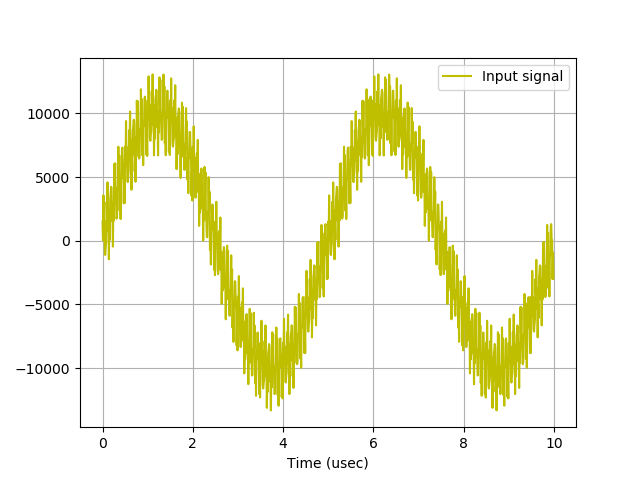

In [2]:
import numpy as np

# Total time
T = 0.002
# Sampling frequency
fs = 100e6
# Number of samples
n = int(T * fs)
# Time vector in seconds
t = np.linspace(0, T, n, endpoint=False)
# Samples of the signal
samples = 10000*np.sin(0.2e6*2*np.pi*t) + 1500*np.cos(46e6*2*np.pi*t) + 2000*np.sin(12e6*2*np.pi*t)
print(samples.shape)
# Convert samples to 32-bit integers
samples = samples.astype(np.int32)
print('Number of samples: ',len(samples))
# Plot signal to the notebook
plot_to_notebook(t,samples,1000)

# Software Implementation using basic Python 

Software FIR execution time:  33.13683247566223


<IPython.core.display.Javascript object>


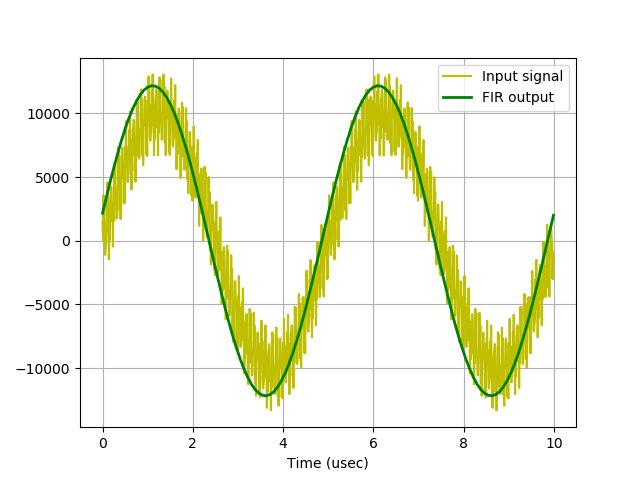

In [3]:
import time

coeffs = [-255,-260,-312,-288,-144,153,616,1233,1963,2739,3474,4081,4481,4620,4481,4081,3474,2739,1963,1233,616,153,-144,-288,-312,-260,-255]

start_time = time.time()
#####  write your code below ######
output_list=[]
First=[coeffs[0]*samples[0]]
output=[]

for n in range(27,len(samples)):
    output=coeffs[1]*samples[n-1]+coeffs[2]*samples[n-2]+coeffs[3]*samples[n-3]+coeffs[4]*samples[n-4]+coeffs[5]*samples[n-5]+coeffs[6]*samples[n-6]+coeffs[7]*samples[n-7]+coeffs[8]*samples[n-8]+coeffs[9]*samples[n-9]+coeffs[10]*samples[n-10]+coeffs[11]*samples[n-11]+coeffs[12]*samples[n-12]+coeffs[13]*samples[n-13]+coeffs[14]*samples[n-14]+coeffs[15]*samples[n-15]+coeffs[16]*samples[n-16]+coeffs[17]*samples[n-17]+coeffs[18]*samples[n-18]+coeffs[19]*samples[n-19]+coeffs[20]*samples[n-20]+coeffs[21]*samples[n-21]+coeffs[22]*samples[n-22]+coeffs[23]*samples[n-23]+coeffs[24]*samples[n-24]+coeffs[25]*samples[n-25]+coeffs[26]*samples[n-26]
    output_list.append(output)
output_list=np.asarray(output_list)

##### write your code above  ######
stop_time = time.time()
sw_exec_time = stop_time - start_time
print('Software FIR execution time: ',sw_exec_time)

# please use the function below to plot your output. Change "?" to the name of your output (and it should be a numpy array). 
plot_to_notebook(t,samples,1000,out_signal=output_list)

# Hardware Implementation

In [4]:
from pynq import Overlay
import pynq.lib.dma

# Load the overlay #### (Please change the directory accoding to where you put the bit file) ####
overlay = Overlay('/home/xilinx/jupyter_notebooks/Lab6/custom_AXIS_FIR.bit')
# Load the FIR DMA
dma = overlay.axi_dma_0

Hardware FIR execution time:  0.004267215728759766
Hardware acceleration factor:  7765.445804000447


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: pynq.Xlnk is deprecated and will be removed in 2.7 - use pynq.allocate instead
  """


<IPython.core.display.Javascript object>


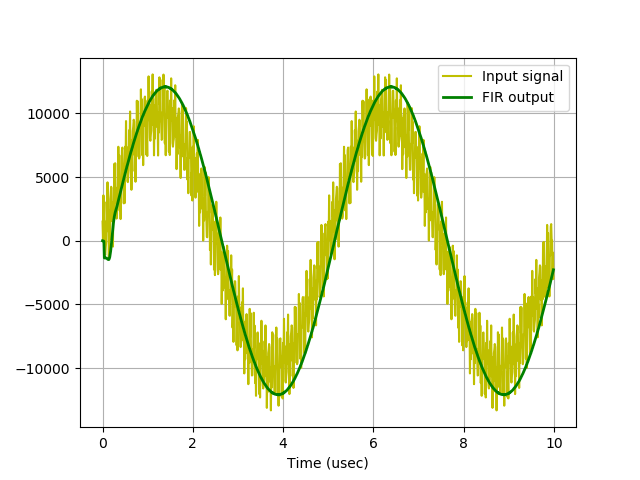

In [5]:
from pynq import Xlnk
import numpy as np
import time
# Allocate buffers for the input and output signals
xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(n+1,), dtype=np.int32)
out_buffer = xlnk.cma_array(shape=(n+1,), dtype=np.int32)

# # Copy the samples to the in_buffer
np.copyto(in_buffer,samples)

# Trigger the DMA transfer and wait for the result
import time
start_time = time.time()
dma.sendchannel.transfer(in_buffer)
dma.recvchannel.transfer(out_buffer)
dma.sendchannel.wait()
dma.recvchannel.wait()
stop_time = time.time()
hw_exec_time = stop_time-start_time
print('Hardware FIR execution time: ',hw_exec_time)
print('Hardware acceleration factor: ',sw_exec_time / hw_exec_time)

# Plot to the notebook
plot_to_notebook(t,samples,1000,out_signal=out_buffer)

# Free the buffers
in_buffer.close()
out_buffer.close()